In [1]:
from cpymad.madx import Madx
import xtrack as xt
import numpy as np
import bpmeth
import matplotlib.pyplot as plt

### ELENA lattice from MAD-X

In [2]:
madx = Madx()

madx.call("acc-models-elena/elena.seq")
#   Apertures:
madx.call("acc-models-elena/elena.dbx")
#   Split elements to allow inserting BPMs:
madx.call("acc-models-elena/tools/splitEle_installBPM.madx")
# call strenghts for a given scenario
madx.call("acc-models-elena/scenarios/highenergy/highenergy.str")
# define beam
madx.call("acc-models-elena/scenarios/highenergy/highenergy.beam")

madx.use("elena")


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.09.03  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2024.04.25               +
  + Execution date: 2025.06.20 16:58:10      +
  ++++++++++++++++++++++++++++++++++++++++++++
! ELENA ring Sequence -> LNR

!

!

! Changelog:

! -  5/06/2018: started with Pavel''s optics

!   - cleaned up some commented lines and added some markers

!   - redefined randomly some names of the e-cool solenoids

!   - TODO: 

!      - cleanup useless lines. re-arrange markers "badly" used here and there.

!      - rename non-existing quad 631 and 626 !!!

! - 24/11/2020: adjusted structure to new standards. Still a lot of work to do to make it LDB compatible.

! - Sep 2021: moving toward LDB-compatible model

!

! TODO: probably need to work on arc lenght for dipoles to match GEODE/drawings/LDB.





/************************************************************************************/

/*            

In [3]:
line = xt.Line.from_madx_sequence(madx.sequence.elena)
line.particle_ref = xt.Particles(p0c=0.1, mass0=0.938272, q0=1)

tw = line.twiss4d()

Converting sequence "elena":   0%|          | 0/191 [00:00<?, ?it/s]

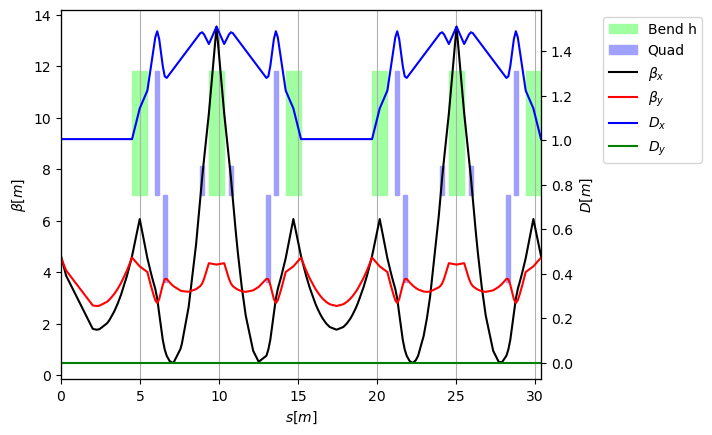

In [4]:
tw.plot()

### Replace a dipole

In [5]:
# Turn of fringes for comparison

line["lnr.mbhek.0135.h1"].edge_entry_fint=0
line["lnr.mbhek.0135.h2"].edge_exit_fint=0
line["lnr.mbhek.0135.h2"]

View of Bend(length=0.485, k0=1.08, k1=0, h=1.08, k0_from_h=True, model='adaptive', knl=array([0., 0., 0., 0., 0., 0.]), ksl=array([0., 0., 0., 0., 0., 0.]), edge_entry_active=np.int64(1), edge_exit_active=np.int64(1), edge_entry_model='linear', edge_exit_model='linear', edge_entry_angle=0, edge_exit_angle=0.287, edge_entry_angle_fdown=0, edge_exit_angle_fdown=0, edge_entry_fint=0, edge_exit_fint=0, edge_entry_hgap=0.038, edge_exit_hgap=0.038, shift_x=0, shift_y=0, rot_s_rad=0)

In [6]:
k1_edge = -line["lnr.mbhek.0135.h1"].k0*np.tan(line["lnr.mbhek.0135.h1"].edge_entry_angle)
dipole_s = line.get_s_position(at_elements="lnr.mbhek.0135.m")
dipole_len = line["lnr.mbhek.0135.h1"].length+line["lnr.mbhek.0135.h2"].length
dipole_k0 = line["lnr.mbhek.0135.h1"].k0
dipole_h = line["lnr.mbhek.0135.h1"].h

In [7]:
test_dipole_A_full = bpmeth.DipoleVectorPotential(b1=f"{dipole_k0}", curv=dipole_h)

test_dipole_H_full = bpmeth.Hamiltonian(dipole_len, dipole_h, test_dipole_A_full)

1.0787486515641855
1.07874865156419*(-0.539374325782093*x**2 - x)/(1.07874865156419*x + 1)


In [8]:
line2 = line.copy()

line2.remove("lnr.mbhek.0135.h1")
line2.remove("lnr.mbhek.0135.m")
line2.remove("lnr.mbhek.0135.h2")
line2.insert("mydipole", test_dipole_H_full, at=dipole_s)

line2.insert("entrance_edge_quad", xt.Quadrupole(knl=(0, k1_edge)), at=dipole_s-dipole_len/2)
line2.insert("exit_edge_quad", xt.Quadrupole(knl=(0, k1_edge)), at=dipole_s+dipole_len/2)

# Line without fringes, with edge angles replaced by quadrupoles 
line3 = line.copy()

line3["lnr.mbhek.0135.h1"].edge_entry_angle = 0
line3["lnr.mbhek.0135.h2"].edge_exit_angle = 0

line3.insert("entrance_edge_quad", xt.Quadrupole(knl=(0, k1_edge)), at=dipole_s-dipole_len/2)
line3.insert("exit_edge_quad", xt.Quadrupole(knl=(0, k1_edge)), at=dipole_s+dipole_len/2)

tab2 = line2.get_table()
tab2.show(cols=['s_start', 's_center', 's_end'])

Slicing line:   0%|          | 0/198 [00:00<?, ?it/s]

Slicing line:   0%|          | 0/197 [00:00<?, ?it/s]

Slicing line:   0%|          | 0/198 [00:00<?, ?it/s]

Slicing line:   0%|          | 0/199 [00:00<?, ?it/s]

Slicing line:   0%|          | 0/200 [00:00<?, ?it/s]

name                          s_start      s_center         s_end
elena$start                         0             0             0
lnr.startsurvey                     0             0             0
lnr.begin                           0             0             0
section1$start                      0             0             0
drift_0                             0        0.1603        0.3206
lnr.mccay.0105                 0.3206        0.3206        0.3206
lnr.bpmeb.0110                 0.3206        0.3206        0.3206
drift_1                        0.3206       1.16575        2.0109
lnr.vvgbf.0114                 2.0109        2.0109        2.0109
drift_2                        2.0109       2.13025        2.2496
lnr.mmidinj                    2.2496        2.2496        2.2496
drift_3                        2.2496        2.3396        2.4296
lnr.mbmie.0115                 2.4296        2.4296        2.4296
drift_4                        2.4296       2.66905        2.9085
lnr.btvpa.

In [31]:
tw2=line2.select("mydipole", "lnr.end").twiss4d(betx=1, bety=1, include_collective=True)
#tw2=line2.twiss4d()
tw3=line3.select("lnr.mbhek.0135.h1", "lnr.end").twiss4d(betx=1, bety=1)

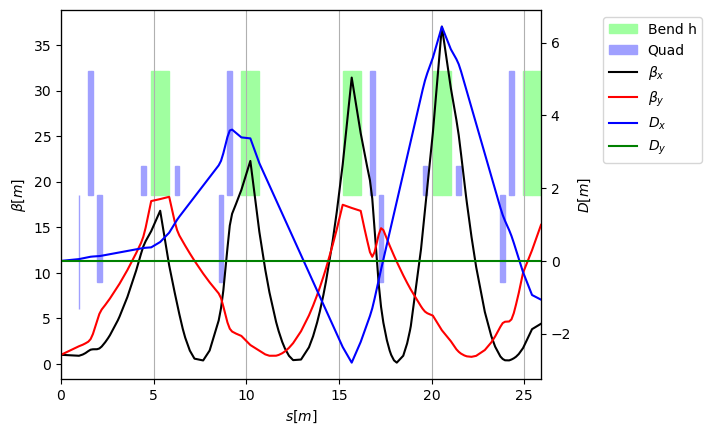

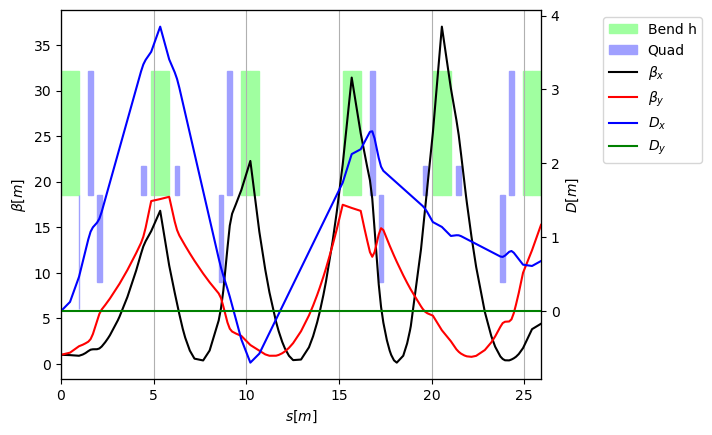

In [32]:
tw2.plot()
tw3.plot()